In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

# 1 Import Data and Calculate Returns

In [5]:
data=pd.read_excel("FINE7037 - Share Data_2021.xlsx",index_col=0)

In [6]:
data

,RBP,IMP,CPI,CLS,NPN,TBS,NED,ABG,AMS,VOD,MTM,J203
CLOSE,,,,,,,,,,,,
2011-12-31,5500,16735,17800,4623,35319,25088,14500,14100,53200,8900,1710,31985.670
2012-01-31,5940,17169,18225,3970,39178,25201,15657,14825,55400,9635,1815,33792.480
2012-02-29,6250,16710,18500,4390,41692,26050,16061,15950,59206,10350,1908,34296.000
2012-03-31,6050,15110,20500,4473,43100,26918,16400,15600,53400,10815,1771,33554.210
2012-04-30,6050,15130,22200,4678,46845,28500,16948,16000,50400,10810,1751,34399.040
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,5016,15088,88412,22827,314739,17633,10498,7928,130412,12843,1654,55721.805
2020-08-31,6455,15637,83500,23000,309275,17243,9599,7725,126417,12787,1516,55476.113
2020-09-30,6953,14547,103738,22233,296000,19077,10077,8932,116305,12327,1550,54264.957


In [7]:
data.shape

(108, 12)

In [8]:
data.head()

,RBP,IMP,CPI,CLS,NPN,TBS,NED,ABG,AMS,VOD,MTM,J203
CLOSE,,,,,,,,,,,,
2011-12-31,5500,16735,17800,4623,35319,25088,14500,14100,53200,8900,1710,31985.67
2012-01-31,5940,17169,18225,3970,39178,25201,15657,14825,55400,9635,1815,33792.48
2012-02-29,6250,16710,18500,4390,41692,26050,16061,15950,59206,10350,1908,34296.00
2012-03-31,6050,15110,20500,4473,43100,26918,16400,15600,53400,10815,1771,33554.21
2012-04-30,6050,15130,22200,4678,46845,28500,16948,16000,50400,10810,1751,34399.04


In [9]:
data.shift(1).head()

,RBP,IMP,CPI,CLS,NPN,TBS,NED,ABG,AMS,VOD,MTM,J203
CLOSE,,,,,,,,,,,,
2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-31,5500.0,16735.0,17800.0,4623.0,35319.0,25088.0,14500.0,14100.0,53200.0,8900.0,1710.0,31985.67
2012-02-29,5940.0,17169.0,18225.0,3970.0,39178.0,25201.0,15657.0,14825.0,55400.0,9635.0,1815.0,33792.48
2012-03-31,6250.0,16710.0,18500.0,4390.0,41692.0,26050.0,16061.0,15950.0,59206.0,10350.0,1908.0,34296.00
2012-04-30,6050.0,15110.0,20500.0,4473.0,43100.0,26918.0,16400.0,15600.0,53400.0,10815.0,1771.0,33554.21


In [10]:
data/data.shift(1)-1

,RBP,IMP,CPI,CLS,NPN,TBS,NED,ABG,AMS,VOD,MTM,J203
CLOSE,,,,,,,,,,,,
2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-31,0.080000,0.025934,0.023876,-0.141250,0.109261,0.004504,0.079793,0.051418,0.041353,0.082584,0.061404,0.056488
2012-02-29,0.052189,-0.026734,0.015089,0.105793,0.064169,0.033689,0.025803,0.075885,0.068700,0.074209,0.051240,0.014900
2012-03-31,-0.032000,-0.095751,0.108108,0.018907,0.033771,0.033321,0.021107,-0.021944,-0.098064,0.044928,-0.071803,-0.021629
2012-04-30,0.000000,0.001324,0.082927,0.045831,0.086891,0.058771,0.033415,0.025641,-0.056180,-0.000462,-0.011293,0.025178
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,0.445117,0.300690,0.029603,0.085140,-0.004970,-0.011603,0.033776,-0.070574,0.039902,0.044571,-0.060761,0.025007
2020-08-31,0.286882,0.036387,-0.055558,0.007579,-0.017360,-0.022118,-0.085635,-0.025605,-0.030634,-0.004360,-0.083434,-0.004409
2020-09-30,0.077149,-0.069706,0.242371,-0.033348,-0.042923,0.106362,0.049797,0.156246,-0.079989,-0.035974,0.022427,-0.021832


In [11]:
ret = data.pct_change()
ret

,RBP,IMP,CPI,CLS,NPN,TBS,NED,ABG,AMS,VOD,MTM,J203
CLOSE,,,,,,,,,,,,
2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-31,0.080000,0.025934,0.023876,-0.141250,0.109261,0.004504,0.079793,0.051418,0.041353,0.082584,0.061404,0.056488
2012-02-29,0.052189,-0.026734,0.015089,0.105793,0.064169,0.033689,0.025803,0.075885,0.068700,0.074209,0.051240,0.014900
2012-03-31,-0.032000,-0.095751,0.108108,0.018907,0.033771,0.033321,0.021107,-0.021944,-0.098064,0.044928,-0.071803,-0.021629
2012-04-30,0.000000,0.001324,0.082927,0.045831,0.086891,0.058771,0.033415,0.025641,-0.056180,-0.000462,-0.011293,0.025178
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,0.445117,0.300690,0.029603,0.085140,-0.004970,-0.011603,0.033776,-0.070574,0.039902,0.044571,-0.060761,0.025007
2020-08-31,0.286882,0.036387,-0.055558,0.007579,-0.017360,-0.022118,-0.085635,-0.025605,-0.030634,-0.004360,-0.083434,-0.004409
2020-09-30,0.077149,-0.069706,0.242371,-0.033348,-0.042923,0.106362,0.049797,0.156246,-0.079989,-0.035974,0.022427,-0.021832


In [12]:
ret.columns

Index(['RBP', 'IMP', 'CPI', 'CLS', 'NPN', 'TBS', 'NED', 'ABG', 'AMS', 'VOD',
       'MTM', 'J203'],
      dtype='object')

In [13]:
ret.index

DatetimeIndex(['2011-12-31', '2012-01-31', '2012-02-29', '2012-03-31',
               '2012-04-30', '2012-05-31', '2012-06-30', '2012-07-31',
               '2012-08-31', '2012-09-30',
               ...
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30'],
              dtype='datetime64[ns]', name='CLOSE', length=108, freq=None)

In [14]:
ret =  ret.drop(axis=0, index=ret.index[0])
ret
#### axis=0 refers to rows, while axis=1 refers to columns

,RBP,IMP,CPI,CLS,NPN,TBS,NED,ABG,AMS,VOD,MTM,J203
CLOSE,,,,,,,,,,,,
2012-01-31,0.080000,0.025934,0.023876,-0.141250,0.109261,0.004504,0.079793,0.051418,0.041353,0.082584,0.061404,0.056488
2012-02-29,0.052189,-0.026734,0.015089,0.105793,0.064169,0.033689,0.025803,0.075885,0.068700,0.074209,0.051240,0.014900
2012-03-31,-0.032000,-0.095751,0.108108,0.018907,0.033771,0.033321,0.021107,-0.021944,-0.098064,0.044928,-0.071803,-0.021629
2012-04-30,0.000000,0.001324,0.082927,0.045831,0.086891,0.058771,0.033415,0.025641,-0.056180,-0.000462,-0.011293,0.025178
2012-05-31,-0.128099,-0.114342,0.016622,0.000214,-0.041755,-0.152632,-0.026611,-0.062500,-0.055317,-0.061055,-0.046830,-0.036525
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,0.445117,0.300690,0.029603,0.085140,-0.004970,-0.011603,0.033776,-0.070574,0.039902,0.044571,-0.060761,0.025007
2020-08-31,0.286882,0.036387,-0.055558,0.007579,-0.017360,-0.022118,-0.085635,-0.025605,-0.030634,-0.004360,-0.083434,-0.004409
2020-09-30,0.077149,-0.069706,0.242371,-0.033348,-0.042923,0.106362,0.049797,0.156246,-0.079989,-0.035974,0.022427,-0.021832


## Calculate the log return of shares

In [15]:
np.log(data/data.shift(1))

,RBP,IMP,CPI,CLS,NPN,TBS,NED,ABG,AMS,VOD,MTM,J203
CLOSE,,,,,,,,,,,,
2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-31,0.076961,0.025603,0.023596,-0.152278,0.103694,0.004494,0.076769,0.050140,0.040521,0.079351,0.059592,0.054950
2012-02-29,0.050872,-0.027098,0.014976,0.100563,0.062194,0.033134,0.025476,0.073144,0.066443,0.071584,0.049970,0.014790
2012-03-31,-0.032523,-0.100651,0.102654,0.018730,0.033214,0.032777,0.020887,-0.022188,-0.103212,0.043948,-0.074511,-0.021866
2012-04-30,0.000000,0.001323,0.079667,0.044811,0.083321,0.057109,0.032868,0.025318,-0.057820,-0.000462,-0.011357,0.024866
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,0.368190,0.262895,0.029173,0.081709,-0.004982,-0.011671,0.033219,-0.073189,0.039126,0.043606,-0.062685,0.024699
2020-08-31,0.252222,0.035740,-0.057161,0.007550,-0.017513,-0.022366,-0.089526,-0.025939,-0.031113,-0.004370,-0.087121,-0.004419
2020-09-30,0.074318,-0.072255,0.217022,-0.033917,-0.043871,0.101077,0.048597,0.145179,-0.083370,-0.036637,0.022180,-0.022074


In [16]:
shr_ret = ret.iloc[:,:-1]
shr_ret

,RBP,IMP,CPI,CLS,NPN,TBS,NED,ABG,AMS,VOD,MTM
CLOSE,,,,,,,,,,,
2012-01-31,0.080000,0.025934,0.023876,-0.141250,0.109261,0.004504,0.079793,0.051418,0.041353,0.082584,0.061404
2012-02-29,0.052189,-0.026734,0.015089,0.105793,0.064169,0.033689,0.025803,0.075885,0.068700,0.074209,0.051240
2012-03-31,-0.032000,-0.095751,0.108108,0.018907,0.033771,0.033321,0.021107,-0.021944,-0.098064,0.044928,-0.071803
2012-04-30,0.000000,0.001324,0.082927,0.045831,0.086891,0.058771,0.033415,0.025641,-0.056180,-0.000462,-0.011293
2012-05-31,-0.128099,-0.114342,0.016622,0.000214,-0.041755,-0.152632,-0.026611,-0.062500,-0.055317,-0.061055,-0.046830
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,0.445117,0.300690,0.029603,0.085140,-0.004970,-0.011603,0.033776,-0.070574,0.039902,0.044571,-0.060761
2020-08-31,0.286882,0.036387,-0.055558,0.007579,-0.017360,-0.022118,-0.085635,-0.025605,-0.030634,-0.004360,-0.083434
2020-09-30,0.077149,-0.069706,0.242371,-0.033348,-0.042923,0.106362,0.049797,0.156246,-0.079989,-0.035974,0.022427


In [17]:
mkt_ret = ret.iloc[:,-1]
mkt_ret

CLOSE
2012-01-31    0.056488
2012-02-29    0.014900
2012-03-31   -0.021629
2012-04-30    0.025178
2012-05-31   -0.036525
                ...   
2020-07-31    0.025007
2020-08-31   -0.004409
2020-09-30   -0.021832
2020-10-31   -0.047549
2020-11-30    0.104619
Name: J203, Length: 107, dtype: float64

In [18]:
mean_ret = shr_ret.mean(axis=0)
mean_ret

RBP    0.009681
IMP    0.011886
CPI    0.022965
CLS    0.017205
NPN    0.024174
TBS    0.000370
NED    0.002625
ABG    0.001424
AMS    0.014178
VOD    0.004746
MTM    0.001431
dtype: float64

In [19]:
var_ret = shr_ret.var(axis=0)
var_ret

RBP    0.015955
IMP    0.026353
CPI    0.008369
CLS    0.003903
NPN    0.007056
TBS    0.005197
NED    0.007095
ABG    0.006950
AMS    0.014796
VOD    0.003435
MTM    0.004625
dtype: float64

In [20]:
((shr_ret-mean_ret)**2).sum()/(len(shr_ret)-1)

RBP    0.015955
IMP    0.026353
CPI    0.008369
CLS    0.003903
NPN    0.007056
TBS    0.005197
NED    0.007095
ABG    0.006950
AMS    0.014796
VOD    0.003435
MTM    0.004625
dtype: float64

In [21]:
cov_shr = shr_ret.cov()
cov_shr

,RBP,IMP,CPI,CLS,NPN,TBS,NED,ABG,AMS,VOD,MTM
RBP,0.015955,0.012919,0.001132,-0.000267,-0.000232,-0.000539,0.004030,0.003426,0.009954,0.001262,0.002311
IMP,0.012919,0.026353,0.002315,-0.001374,-0.000075,0.000305,0.004658,0.003462,0.013077,0.000980,0.003437
CPI,0.001132,0.002315,0.008369,0.000528,-0.000655,0.000276,0.003454,0.003412,0.000256,-0.000424,0.001696
CLS,-0.000267,-0.001374,0.000528,0.003903,-0.000130,0.001475,0.000153,0.000259,0.000061,0.000676,0.000866
NPN,-0.000232,-0.000075,-0.000655,-0.000130,0.007056,0.001127,0.000272,0.000346,-0.000166,0.000580,-0.000022
TBS,-0.000539,0.000305,0.000276,0.001475,0.001127,0.005197,0.000118,0.000998,0.000353,0.001474,0.001170
NED,0.004030,0.004658,0.003454,0.000153,0.000272,0.000118,0.007095,0.005771,0.003067,0.000877,0.003073
ABG,0.003426,0.003462,0.003412,0.000259,0.000346,0.000998,0.005771,0.006950,0.002799,0.000696,0.002958
AMS,0.009954,0.013077,0.000256,0.000061,-0.000166,0.000353,0.003067,0.002799,0.014796,0.000768,0.002620
VOD,0.001262,0.000980,-0.000424,0.000676,0.000580,0.001474,0.000877,0.000696,0.000768,0.003435,0.001091


In [22]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [23]:
np.random.random((5,5))

array([[0.16301692, 0.91380294, 0.62327788, 0.82380141, 0.69949219],
       [0.36839541, 0.51305264, 0.5769469 , 0.64675135, 0.37612047],
       [0.43772259, 0.07683867, 0.58333351, 0.63420507, 0.87606229],
       [0.66597223, 0.09659579, 0.59006845, 0.96290595, 0.93262714],
       [0.11807959, 0.6704443 , 0.76483066, 0.95180381, 0.4688308 ]])

In [24]:
#### Equal weight
wght1 = np.ones(len(shr_ret.columns))/len(shr_ret.columns)
wght1

array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909])

In [25]:
#### Random weight
wght2 = np.random.random(len(shr_ret.columns))
wght2 = wght2/wght2.sum()
wght2

array([0.14991668, 0.05910934, 0.16736786, 0.0306862 , 0.16114172,
       0.01585672, 0.06388628, 0.11517751, 0.14940939, 0.05042134,
       0.03702696])

In [26]:
mean_ret*wght1

RBP    0.000880
IMP    0.001081
CPI    0.002088
CLS    0.001564
NPN    0.002198
TBS    0.000034
NED    0.000239
ABG    0.000129
AMS    0.001289
VOD    0.000431
MTM    0.000130
dtype: float64

## Calculate portfolio return and covariance

In [27]:
pf1_ret = np.dot(mean_ret.T, wght1)
pf1_ret

0.010062244773204516

In [28]:
pf2_ret = np.dot(mean_ret.T, wght2)
pf2_ret

0.01316910779709991

In [29]:
#### Test the return of portfolio 1
(shr_ret*wght1).sum(axis=1).mean(axis=0)
#### axis=1 is across columns and axis=0 is across rows

0.010062244773204521

In [30]:
pf1_var = np.dot(np.dot(wght1.T,cov_shr),wght1)
pf2_var = np.dot(np.dot(wght2.T,cov_shr),wght2)

In [31]:
pf1_var

0.0025541082777263977

In [32]:
pf2_var

0.0032531818546630777

In [33]:
#### Test the variance of portfolio 1
(shr_ret*wght1).sum(1).var()

0.0025541082777263977

In [34]:
cov_12 = np.dot(np.dot(wght1.T,cov_shr),wght2)
cov_12

0.002792015860242092

In [35]:
pf1 = (shr_ret*wght1).sum(1)
pf2 = (shr_ret*wght2).sum(1)

In [36]:
pfs = pd.concat([pf1,pf2],axis=1)
pfs.columns = ['Pf1','Pf2']
pfs

,Pf1,Pf2
CLOSE,,
2012-01-31,0.038080,0.054502
2012-02-29,0.049094,0.049182
2012-03-31,-0.005402,-0.002037
2012-04-30,0.024260,0.026550
2012-05-31,-0.061119,-0.054299
...,...,...
2020-07-31,0.075535,0.091075
2020-08-31,0.000558,0.016639
2020-09-30,0.035674,0.050000


In [37]:
pfs.cov()

,Pf1,Pf2
Pf1,0.002554,0.002792
Pf2,0.002792,0.003253


In [38]:
pfs.cov().iloc[1,0]

0.002792015860242092

In [39]:
cov_12

0.002792015860242092

#### SO far, we have two portfolios
with their own standard deviation and their covariance

In [40]:
W1 = np.arange(-200,200,10)/100
W2 = 1-W1
# W1 and W2 are inserted here for simulating the line of frontier by using pf1 and pf2
# we can use at least two portfolios to simulate the frontier
# However, pf1 and pf2 are not on the efficient frontier, thus the frontier that drawn by these two portfolios are not
# the efficient frontier line

In [41]:
exp_opf = pf1_ret*W1 + pf2_ret*W2

In [42]:
var_opf = (pf1_var*W1**2)+(pf2_var*W2**2)+2*W1*W2*cov_12

In [43]:
sd_opf = np.sqrt(var_opf)

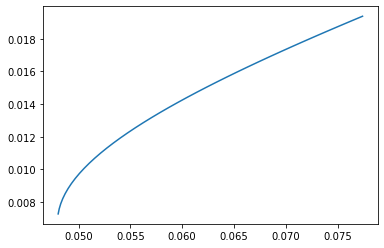

In [44]:
plt.plot(sd_opf, exp_opf)

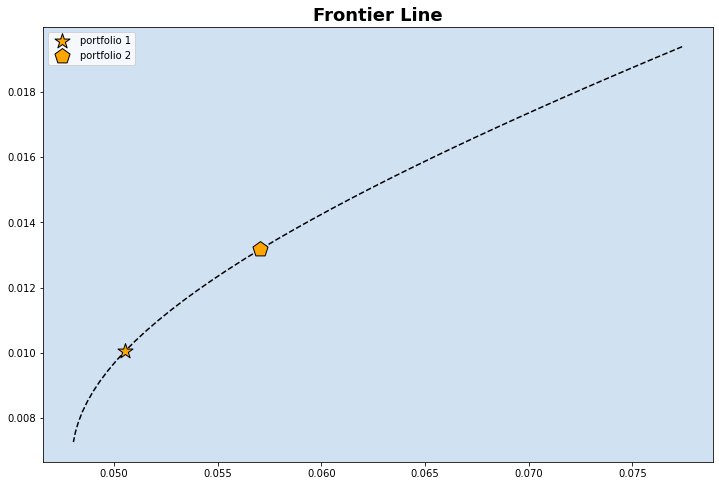

In [45]:
fig,axe = plt.subplots(1,1,figsize=(12,8))
axe.plot(sd_opf, exp_opf, color = "k", linestyle = "--")
# Add facecolor and title
axe.set_facecolor(plt.cm.Blues(.2))
axe.set_title("Frontier Line", fontsize=18, fontweight='bold')
# Add scatters
axe.scatter(np.sqrt(pf1_var), pf1_ret, s=250, color = "orange", edgecolor = "k", marker = "*", zorder=3, label="portfolio 1")
axe.scatter(np.sqrt(pf2_var), pf2_ret, s=250, color = "orange", edgecolor = "k", marker = "p", zorder=3, label="portfolio 2")
plt.legend()


# 2 Let's calculate some efficient portfolios
1) Calculate the first efficient portfolio assuming c equals 5%, which give us the highest sharpe ratio portfolio

efficient weight1 = [S^(-1) * (E(R)-c) / sum(S^(-1) * (E(R)-c))]

S is the matrix of share covariance

2) Calculate the second efficient portfolio with global minimum variance portolio method, which give us the lowest variance portfolio

efficient weight2 = [l * S^(-1)/(1 * S^(-1) * 1.T)]

In [46]:
c = 0.05/12

In [47]:
inv_cov_shr = np.linalg.inv(cov_shr)# Calculate the inverse of the covariance matrix
inv_cov_shr.shape

(11, 11)

In [48]:
pd.DataFrame(np.round(inv_cov_shr,2), index = cov_shr.index, columns = cov_shr.columns)

,RBP,IMP,CPI,CLS,NPN,TBS,NED,ABG,AMS,VOD,MTM
RBP,135.47,-36.21,4.37,-10.98,2.40,33.95,-14.99,-24.58,-53.03,-35.90,15.30
IMP,-36.21,86.93,-18.71,41.05,-0.46,-18.75,-27.39,35.81,-49.60,3.41,-19.99
CPI,4.37,-18.71,170.51,-28.05,17.26,-7.07,-50.08,-46.79,29.36,48.88,-8.67
CLS,-10.98,41.05,-28.05,320.15,16.41,-83.46,-10.58,41.35,-22.25,-24.51,-54.51
NPN,2.40,-0.46,17.26,16.41,151.69,-37.68,-19.45,-2.88,3.46,-11.42,15.49
TBS,33.95,-18.75,-7.07,-83.46,-37.68,283.78,108.50,-102.01,-4.33,-101.15,-37.31
NED,-14.99,-27.39,-50.08,-10.58,-19.45,108.50,538.46,-376.53,10.86,-70.32,-85.83
ABG,-24.58,35.81,-46.79,41.35,-2.88,-102.01,-376.53,516.07,-24.06,43.74,-55.70
AMS,-53.03,-49.60,29.36,-22.25,3.46,-4.33,10.86,-24.06,152.55,18.80,-24.82
VOD,-35.90,3.41,48.88,-24.51,-11.42,-101.15,-70.32,43.74,18.80,381.66,-54.35


In [49]:
#### Test the inverse matrix
pd.DataFrame(np.dot(inv_cov_shr,cov_shr),index = cov_shr.index, columns = cov_shr.columns)

,RBP,IMP,CPI,CLS,NPN,TBS,NED,ABG,AMS,VOD,MTM
RBP,1.000000e+00,2.983724e-16,2.775558e-17,-1.040834e-17,9.866240e-18,6.245005e-17,1.318390e-16,4.857226e-17,-4.857226e-17,5.898060e-17,8.326673e-17
IMP,-2.151057e-16,1.000000e+00,-6.245005e-17,1.387779e-17,-3.740497e-18,-4.163336e-17,-1.040834e-16,-4.857226e-17,-1.873501e-16,-3.469447e-18,0.000000e+00
CPI,1.804112e-16,2.602085e-16,1.000000e+00,1.561251e-17,-6.356135e-17,1.561251e-17,3.469447e-17,3.469447e-18,1.942890e-16,1.387779e-17,1.110223e-16
CLS,-5.551115e-17,2.220446e-16,1.387779e-17,1.000000e+00,-1.734723e-17,-6.938894e-17,0.000000e+00,8.326673e-17,-1.110223e-16,-1.040834e-16,1.110223e-16
NPN,2.081668e-17,2.081668e-17,6.938894e-18,1.561251e-17,1.000000e+00,-3.816392e-17,2.081668e-17,-2.081668e-17,2.775558e-17,1.734723e-17,2.081668e-17
TBS,5.551115e-17,1.110223e-16,1.249001e-16,-4.163336e-17,7.242471e-17,1.000000e+00,2.775558e-16,1.249001e-16,2.775558e-17,0.000000e+00,1.665335e-16
NED,2.775558e-16,2.220446e-16,-5.551115e-17,0.000000e+00,1.008308e-16,-1.387779e-17,1.000000e+00,1.665335e-16,8.326673e-17,-2.775558e-17,2.220446e-16
ABG,-4.440892e-16,-3.608225e-16,-3.053113e-16,6.938894e-18,-6.852158e-17,0.000000e+00,-3.608225e-16,1.000000e+00,-3.053113e-16,5.551115e-17,-2.220446e-16
AMS,4.996004e-16,7.216450e-16,2.775558e-17,0.000000e+00,-1.507041e-17,1.387779e-17,1.387779e-16,1.665335e-16,1.000000e+00,1.387779e-17,1.387779e-16
VOD,-2.220446e-16,-5.551115e-17,-9.714451e-17,-4.163336e-17,9.540979e-17,1.249001e-16,-1.387779e-16,2.775558e-17,5.551115e-17,1.000000e+00,-5.551115e-17


#### efficient weight1 = [S^(-1) * E(R)-c) / sum(S^(-1) * (E(R)-c))]

In [47]:
eff_w1 = np.dot(inv_cov_shr,(mean_ret-c))/np.sum(np.dot(inv_cov_shr,(mean_ret-c)))

pd.Series(eff_w1, index = shr_ret.columns)

RBP   -0.023884
IMP    0.029688
CPI    0.490046
CLS    0.586951
NPN    0.504351
TBS   -0.389705
NED   -0.224504
ABG   -0.103341
AMS    0.178574
VOD    0.151941
MTM   -0.200116
dtype: float64

In [48]:
eff_ret1 = np.dot(mean_ret,eff_w1)
eff_ret1

0.03575185590828548

In [49]:
eff_var1 = np.dot(np.dot(eff_w1.T,cov_shr),eff_w1)
eff_var1

0.004248758013699668

In [50]:
sharpe_ratio1 = (eff_ret1-c)/np.sqrt(eff_var1)
sharpe_ratio1

0.4845654942511517

#### efficient weight2 = [l * S^(-1)/(1 * S^(-1) * 1.T)]

In [51]:
eff_w2 = np.dot(np.ones(len(cov_shr)), inv_cov_shr)/ \
np.dot(np.dot(np.ones(len(cov_shr)), inv_cov_shr),np.ones(len(cov_shr)).T)
#### use backslash "\" to connect this with the next line
pd.Series(eff_w2, index = cov_shr.columns)

RBP    0.020365
IMP   -0.005073
CPI    0.143240
CLS    0.238218
NPN    0.173933
TBS    0.044454
NED    0.003397
ABG    0.005720
AMS    0.047639
VOD    0.256554
MTM    0.071553
dtype: float64

In [52]:
eff_ret2 = np.dot(eff_w2.T,mean_ret)
eff_var2 = np.dot(np.dot(eff_w2.T,cov_shr), eff_w2)
sharpe_ratio2 = (eff_ret2-c)/np.sqrt(eff_var2)
sharpe_ratio2

0.26702981170638673

In [53]:
cov_eff12 = np.dot(np.dot(eff_w1.T, cov_shr), eff_w2)
cov_eff12

0.0012902578971436152

#### Simulating the efficient frontier line by using these two efficient portfolios

In [54]:
W1 = np.arange(-200,200,10)/100
W2 = 1-W1

In [55]:
exp_eff = eff_ret1*W1 + eff_ret2*W2 # We need at least two whatever portfolios to draw the efficient frontier
cov_eff = (eff_var1*W1**2) + (eff_var2*W2**2) + 2*W1*W2*cov_eff12 # and that's the reason why we use W1 and W2 here to do the simulation
sd_eff = np.sqrt(cov_eff)


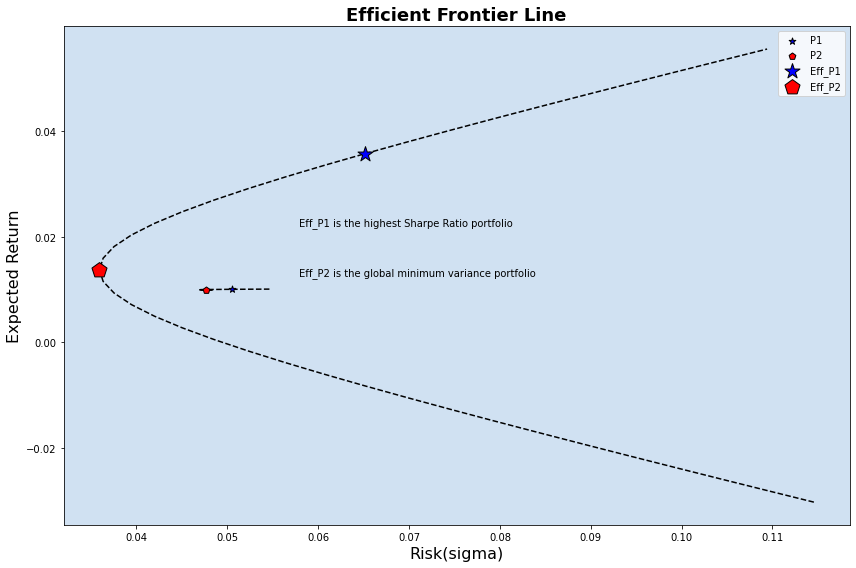

In [56]:
fig,axe = plt.subplots(1,1,figsize=(12,8))
# Define x and y
axe.plot(sd_eff, exp_eff, color = "k", linestyle = "--")
axe.plot(sd_opf, exp_opf, color = "k", linestyle = "--")
# Add facecolor and title
axe.set_facecolor(plt.cm.Blues(.2))
axe.set_title("Efficient Frontier Line", fontsize=18, fontweight='bold')
# Add scatters
axe.scatter(np.sqrt(pf1_var), pf1_ret, s=50, color = "blue", edgecolor = "k", marker = "*", zorder=3, label = "P1")
axe.scatter(np.sqrt(pf2_var), pf2_ret, s=50, color = "red", edgecolor = "k", marker = "p", zorder=3, label = "P2")
axe.scatter(np.sqrt(eff_var1), eff_ret1, s=250, color = "blue", edgecolor = "k", marker = "*", zorder=3, label = "Eff_P1")
axe.scatter(np.sqrt(eff_var2), eff_ret2, s=250, color = "red", edgecolor = "k", marker = "p", zorder=3, label = "Eff_P2")
plt.legend()
# Name the x and y
axe.set_xlabel('Risk(sigma)', fontsize=16)
axe.set_ylabel('Expected Return', fontsize=16)
# Add a note
axe.annotate('Eff_P1 is the highest Sharpe Ratio portfolio', xy=(0.3,0.6), xycoords='axes fraction')
axe.annotate('Eff_P2 is the global minimum variance portfolio', xy = (0.3,0.5), xycoords='axes fraction')

fig.tight_layout()
plt.show()


### Efficient Portfolios Without Short Sales

In [57]:
from scipy.optimize import minimize

In [58]:
returns = shr_ret

In [59]:
# the objective function is to minimize the portfolio risk
def objective(weights): 
    weights = np.array(weights)
    return weights.dot(returns.cov()).dot(weights.T)
 
# The constraints
cons = (# The weights must sum up to one.
        {"type":"eq", "fun": lambda x: np.sum(x)-1}, 
        # This constraints says that the inequalities (ineq) must be non-negative.
        # The expected daily return of our portfolio and we want to be at greater than 0.003
        {"type": "ineq", "fun": lambda x: np.sum(returns.mean()*x)-0.003}) 
 
 
# Every stock can get any weight from 0 to 1
bounds = tuple((0,1) for x in range(returns.shape[1])) 
 
# Initialize the weights with an even split
# In out case each stock will have 10% at the beginning
guess = [1./returns.shape[1] for x in range(returns.shape[1])]
 
 
optimized_results = minimize(objective, guess, method = "SLSQP", bounds=bounds, constraints=cons)
optimized_results

     fun: 0.0013123571401607598
     jac: array([0.00283331, 0.00292492, 0.00227536, 0.00259116, 0.00274135,
       0.00302496, 0.00250785, 0.00257574, 0.00275588, 0.00249345,
       0.00264059])
 message: 'Optimization terminated successfully'
    nfev: 168
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([0.03623918, 0.        , 0.11633778, 0.23042084, 0.17741463,
       0.1053853 , 0.00968557, 0.        , 0.03858612, 0.207469  ,
       0.07846158])

In [60]:
optimized_results.x.reshape(-1,1)

array([[0.03623918],
       [0.        ],
       [0.11633778],
       [0.23042084],
       [0.17741463],
       [0.1053853 ],
       [0.00968557],
       [0.        ],
       [0.03858612],
       [0.207469  ],
       [0.07846158]])

In [61]:
# it is expected to be 1
np.sum(optimized_results.x)

1.0000000000000002

In [62]:
# the expected return of the portfolio
np.sum(returns.mean()*optimized_results.x)

0.012984102495153143

In [63]:
# report the final optimized weights
pd.DataFrame(list(zip(shr_ret.columns, optimized_results.x)), columns=['Symbol', 'Weight'])

,Symbol,Weight
0,RBP,0.036239
1,IMP,0.000000
2,CPI,0.116338
3,CLS,0.230421
4,NPN,0.177415
5,TBS,0.105385
6,NED,0.009686
7,ABG,0.000000
8,AMS,0.038586
9,VOD,0.207469


## Four Alternatives to the Sample Variance-Covariance Matrix
**Shrinkage methods** assume that the variance-covariance matrix is a convex combination of the sample variance-covariance and a matrix with variances on the diagonal and zeros elsewhere.

**Shrinkage variance-covariance matrix = λ*Sample var-cov + (1 − λ )*Other matrix**

In [64]:
returns = shr_ret

In [65]:
sample_cov = returns.cov()

In [66]:
dgnl = np.diag(sample_cov).reshape(-1,1)
dgnl

array([[0.01595491],
       [0.02635268],
       [0.00836898],
       [0.00390317],
       [0.00705559],
       [0.00519695],
       [0.00709458],
       [0.00694971],
       [0.01479609],
       [0.00343504],
       [0.00462522]])

In [67]:
dgnl_mtr = np.zeros((returns.shape[1],returns.shape[1]))
np.fill_diagonal(dgnl_mtr, dgnl)
dgnl_mtr = pd.DataFrame(dgnl_mtr, columns=returns.columns, index=returns.columns)

In [68]:
shrink_fac = 0.3

In [69]:
shrink_mtr = np.round(shrink_fac * sample_cov + (1 - shrink_fac) * dgnl_mtr,4)
shrink_mtr

,RBP,IMP,CPI,CLS,NPN,TBS,NED,ABG,AMS,VOD,MTM
RBP,0.0160,0.0039,0.0003,-0.0001,-0.0001,-0.0002,0.0012,0.0010,0.0030,0.0004,0.0007
IMP,0.0039,0.0264,0.0007,-0.0004,-0.0000,0.0001,0.0014,0.0010,0.0039,0.0003,0.0010
CPI,0.0003,0.0007,0.0084,0.0002,-0.0002,0.0001,0.0010,0.0010,0.0001,-0.0001,0.0005
CLS,-0.0001,-0.0004,0.0002,0.0039,-0.0000,0.0004,0.0000,0.0001,0.0000,0.0002,0.0003
NPN,-0.0001,-0.0000,-0.0002,-0.0000,0.0071,0.0003,0.0001,0.0001,-0.0000,0.0002,-0.0000
TBS,-0.0002,0.0001,0.0001,0.0004,0.0003,0.0052,0.0000,0.0003,0.0001,0.0004,0.0004
NED,0.0012,0.0014,0.0010,0.0000,0.0001,0.0000,0.0071,0.0017,0.0009,0.0003,0.0009
ABG,0.0010,0.0010,0.0010,0.0001,0.0001,0.0003,0.0017,0.0069,0.0008,0.0002,0.0009
AMS,0.0030,0.0039,0.0001,0.0000,-0.0000,0.0001,0.0009,0.0008,0.0148,0.0002,0.0008
VOD,0.0004,0.0003,-0.0001,0.0002,0.0002,0.0004,0.0003,0.0002,0.0002,0.0034,0.0003


#### 3 Test the SML (CAPM)

In [70]:
rf = 0.065/12
exc_ret = shr_ret.mean(0)-rf
exc_ret

RBP    0.004264
IMP    0.006469
CPI    0.017549
CLS    0.011788
NPN    0.018757
TBS   -0.005046
NED   -0.002791
ABG   -0.003993
AMS    0.008762
VOD   -0.000671
MTM   -0.003986
dtype: float64

In [71]:
rm = mkt_ret
rm

CLOSE
2012-01-31    0.056488
2012-02-29    0.014900
2012-03-31   -0.021629
2012-04-30    0.025178
2012-05-31   -0.036525
                ...   
2020-07-31    0.025007
2020-08-31   -0.004409
2020-09-30   -0.021832
2020-10-31   -0.047549
2020-11-30    0.104619
Name: J203, Length: 107, dtype: float64

In [72]:
eff_w = np.dot(inv_cov_shr,(mean_ret-rf))/np.sum(np.dot(inv_cov_shr,(mean_ret-rf)))

pd.Series(eff_w, index = shr_ret.columns)

RBP   -0.030515
IMP    0.034897
CPI    0.542014
CLS    0.639208
NPN    0.553863
TBS   -0.454763
NED   -0.258655
ABG   -0.119684
AMS    0.198195
VOD    0.136265
MTM   -0.240826
dtype: float64

In [73]:
eff_pf_ret = (shr_ret*eff_w).sum(1)
eff_pf_ret

CLOSE
2012-01-31   -0.042547
2012-02-29    0.089129
2012-03-31    0.073013
2012-04-30    0.075498
2012-05-31    0.061707
                ...   
2020-07-31    0.098226
2020-08-31    0.006332
2020-09-30   -0.024614
2020-10-31    0.145888
2020-11-30   -0.061560
Length: 107, dtype: float64

#### 3.1 Two-pass Regression
1 First Pass: Estimate the time-series alphas and betas for your shares against the efficient portfolio returns or benchmark return\
2 Second Pass: Regress excess returns of shares on betas, which obtained from the first pass

In [74]:
(eff_pf_ret-rf).mean()

0.0336308745375959

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
ols_model = LinearRegression()

In [77]:
#### ols_model.fit(x,y). Here, rm_ols is x and shr_ret is y
rm_ols=rm.values[:,np.newaxis]
beta1 = ols_model.fit(rm_ols,shr_ret.loc[:,'RBP']).coef_[0]
beta1
#### Here, we use the market return as the benchmark return (or we can use the efficient portfolio return)
#### For iloc you must specify the position; for loc you need to specify the label
#### the x variable in ols_model must be a dataframe rather than a vector

1.38630978721925

#### First Pass
#### Formula:  r_i,t = beta_i * rm_t + e_i,t

In [78]:
#### Note that we are using the efficient portfolio return here rather than the benchmark return
eff_pf_ret_ols = eff_pf_ret.values[:,np.newaxis]
betas = [ols_model.fit(eff_pf_ret_ols, shr_ret.loc[:,i]).coef_[0] for i in shr_ret.columns]
betas

[0.12678849133393474,
 0.19235247633486738,
 0.5218053665046674,
 0.3505066166716196,
 0.5577374735749968,
 -0.15004636954449052,
 -0.08300073979033272,
 -0.11873274528692336,
 0.2605272726391508,
 -0.01994454354719586,
 -0.11851573922141892]

In [79]:
# Or we can use the old way to do the loop
betas = []
for i in shr_ret.columns:
    b = ols_model.fit(eff_pf_ret_ols, shr_ret.loc[:,i]).coef_[0]
    betas.append(b)
betas

[0.12678849133393474,
 0.19235247633486738,
 0.5218053665046674,
 0.3505066166716196,
 0.5577374735749968,
 -0.15004636954449052,
 -0.08300073979033272,
 -0.11873274528692336,
 0.2605272726391508,
 -0.01994454354719586,
 -0.11851573922141892]

In [80]:
beta_ols = np.array(betas).reshape(len(betas),1) # beta_ols = betas.values[:,np.newaxis]
beta_ols

array([[ 0.12678849],
       [ 0.19235248],
       [ 0.52180537],
       [ 0.35050662],
       [ 0.55773747],
       [-0.15004637],
       [-0.08300074],
       [-0.11873275],
       [ 0.26052727],
       [-0.01994454],
       [-0.11851574]])

In [81]:
betas = pd.DataFrame(betas)
betas.columns=["Betas"]
betas

,Betas
0,0.126788
1,0.192352
2,0.521805
3,0.350507
4,0.557737
5,-0.150046
6,-0.083001
7,-0.118733
8,0.260527
9,-0.019945


#### Second Pass 
#### Formula: E(ri) - rf = alpha_i + Z*beta_i + e_i 
If the CAPM would hold, then the alpha should be zero an Z should be the market risk premium (rm-rf) \
Z is also the slope of SML \
**i.e. the above equation should become ri = rf + (rm-rf)*beta_i, as the CAPM described**

In [82]:
#### exc_ret = shr_ret.mean(0)-rf
sec_pass = ols_model.fit(beta_ols, exc_ret)
np.round(sec_pass.intercept_,2)

-0.0

In [83]:
sec_pass.coef_[0]

0.0336308745375959

In [84]:
(rm - rf).mean(0)
#### which indicates that market risk premium is not equal to rm (J203T) - rf

0.000754949309109442

#### However, if we use the market return (J203T) as the benchmark return to run the first pass regression

In [85]:
#### First Pass
betas_1 = [ols_model.fit(rm_ols, shr_ret.loc[:,i]).coef_[0] for i in shr_ret.columns]
betas_1 = np.array(betas_1).reshape(len(betas_1),1)
betas_1

array([[1.38630979],
       [1.58912291],
       [0.50385665],
       [0.14270686],
       [1.0348003 ],
       [0.39978055],
       [1.32884086],
       [1.16874263],
       [1.41733014],
       [0.45753406],
       [0.92156694]])

In [86]:
#### Second Pass
sec_pass_1 = ols_model.fit(betas_1, exc_ret)
np.round(sec_pass_1.intercept_,6)

0.006173

In [87]:
np.round(sec_pass_1.coef_[0],6)

-0.001623

#### *In short, we found that J203T are not the efficient portfolio*

#### 3.2 Fama-MacBeth Regression (By using the rolling windows)

In [88]:
window = list(range(36, len(shr_ret),12))
window

[36, 48, 60, 72, 84, 96]

In [89]:
#### lb stands for lookback
lb = 36

In [90]:
shr_ret_win = [shr_ret.iloc[(i-lb):i,:] for i in window]
#### the last lookback window would be month60 to month96

In [91]:
mkt_ret_win = [mkt_ret.iloc[(i-lb):i].values[:,np.newaxis] for i in window]

In [92]:
print(len(shr_ret_win),len(shr_ret_win))

6 6


In [93]:
exc_ret_win = [(s.mean(0)-rf) for s in shr_ret_win]

In [94]:
def beta_function(bnch,df_ret): # Here, bnch is x and df_ret is y
    betas=[]
    for c in df_ret.columns:
        betas.append(ols_model.fit(bnch,df_ret.loc[:,c]).coef_[0])
    return pd.Series(betas,index=df_ret.columns)

In [95]:
beta_win=[beta_function(s,b) for s,b in zip(mkt_ret_win,shr_ret_win)]

In [96]:
exc_ret_all = pd.concat(exc_ret_win, ignore_index=True)
beta_all = pd.concat(beta_win, ignore_index=True)
#### Use pd.concat to combine the lists together
beta_all

0     1.203609
1     1.261605
2    -0.716115
3     0.303915
4     1.415571
        ...   
61    0.358983
62    0.433729
63    1.492585
64    0.205036
65    0.561894
Length: 66, dtype: float64

In [97]:
capm_test = ols_model.fit(exc_ret_all.values[:,np.newaxis], beta_all)
capm_test.intercept_

0.8725975863926281

In [98]:
capm_test.coef_[0]

-0.9773385195160331

#### 4 Black-Litterman

In [99]:
# Black and Litterman’s Solution to the Optimization Problem

# Step 1: What does the market think? It assumes that the benchmark is optimal and derives the expected 
# returns of each asset under this assumption.

# Step 2: Incorporating investor opinions. In Step 1, BL shows how to compute the benchmark asset returns 
# based on the assumption of optimality. Suppose the investor has divergent opinions from these market-based expected 
# returns. Step 2 shows how to incorporate these opinions into the optimization procedure. 

# Note that because of the correlations between asset returns an investor’s opinion about any particular asset’s 
# returns will affect all the other expected returns. A critical part in Step 2 is to adjust all asset returns for 
# an investor’s opinion about any return.


In [100]:
mcap = pd.read_excel('FINE7037 - Share Data_2021.xlsx', sheet_name="Sheet2", index_col=0)
mcap

,Mcap
Share,
RBP,1.650058e+04
IMP,1.272104e+05
CPI,1.497971e+05
CLS,5.838102e+04
NPN,1.365700e+06
TBS,3.739433e+04
NED,6.150168e+04
ABG,9.342212e+04
AMS,2.987694e+05


In [101]:
mcap_wght = mcap.values/mcap.values.sum()

In [102]:
mcap_wght.sum()

1.0

In [103]:
rf = 0.07/12

In [104]:
exp_ret = shr_ret.mean()
exp_ret

RBP    0.009681
IMP    0.011886
CPI    0.022965
CLS    0.017205
NPN    0.024174
TBS    0.000370
NED    0.002625
ABG    0.001424
AMS    0.014178
VOD    0.004746
MTM    0.001431
dtype: float64

In [105]:
#### calculate the weights of the tangency portfolio 
S = shr_ret.cov()
naive_wght = np.dot(np.linalg.inv(S),(exp_ret-rf))/np.sum(np.dot(np.linalg.inv(S),(exp_ret-rf)))

In [106]:
pd.Series(naive_wght, index=S.columns)

RBP   -0.033190
IMP    0.036998
CPI    0.562980
CLS    0.660291
NPN    0.573838
TBS   -0.481009
NED   -0.272432
ABG   -0.126277
AMS    0.206110
VOD    0.129940
MTM   -0.257249
dtype: float64

In [107]:
exp_bnch = 0.12/12

In [108]:
norm=(exp_bnch-rf)/np.dot(mcap_wght.T,np.dot(S,mcap_wght))
norm

array([[1.48664733]])

In [109]:
BL_exp_ret = (np.dot(S,mcap_wght)*norm)+rf
BL_exp_ret = pd.Series(np.reshape(BL_exp_ret,-1), index = shr_ret.columns)
BL_exp_ret
#### Use np.reshape(array, -1) to covert the array to a vector

RBP    0.009225
IMP    0.011008
CPI    0.006668
CLS    0.006018
NPN    0.011459
TBS    0.007330
NED    0.008177
ABG    0.008099
AMS    0.009915
VOD    0.007128
MTM    0.007498
dtype: float64

In [110]:
#### Annualized
BL_exp_ret*12

RBP    0.110695
IMP    0.132090
CPI    0.080016
CLS    0.072215
NPN    0.137512
TBS    0.087954
NED    0.098121
ABG    0.097187
AMS    0.118984
VOD    0.085541
MTM    0.089977
dtype: float64

In [111]:
np.dot(BL_exp_ret, mcap_wght) *12

array([0.12])

In [112]:
test=pd.Series(np.dot(np.linalg.inv(S),BL_exp_ret-rf)/np.sum(np.dot(np.linalg.inv(S),BL_exp_ret-rf)),index=S.columns)

In [113]:
test

RBP    0.006446
IMP    0.049697
CPI    0.058521
CLS    0.022808
NPN    0.533534
TBS    0.014609
NED    0.024027
ABG    0.036497
AMS    0.116719
VOD    0.088382
MTM    0.048761
dtype: float64

In [114]:
mcap_wght

array([[0.00644623],
       [0.04969693],
       [0.05852079],
       [0.02280754],
       [0.53353398],
       [0.01460873],
       [0.02402668],
       [0.03649695],
       [0.11671938],
       [0.08838204],
       [0.04876074]])

In [115]:
BL_trck=S.divide(shr_ret.var(),axis=0)
BL_trck

,RBP,IMP,CPI,CLS,NPN,TBS,NED,ABG,AMS,VOD,MTM
RBP,1.000000,0.809701,0.070935,-0.016704,-0.014564,-0.033807,0.252598,0.214758,0.623907,0.079105,0.144822
IMP,0.490224,1.000000,0.087863,-0.052146,-0.002840,0.011556,0.176754,0.131388,0.496233,0.037200,0.130416
CPI,0.135232,0.276668,1.000000,0.063120,-0.078245,0.032983,0.412767,0.407681,0.030563,-0.050690,0.202682
CLS,-0.068281,-0.352067,0.135339,1.000000,-0.033384,0.377991,0.039200,0.066439,0.015528,0.173219,0.221893
NPN,-0.032935,-0.010608,-0.092811,-0.018468,1.000000,0.159707,0.038539,0.049108,-0.023463,0.082148,-0.003086
TBS,-0.103789,0.058597,0.053115,0.283891,0.216825,1.000000,0.022757,0.191984,0.068014,0.283564,0.225221
NED,0.568063,0.656550,0.486913,0.021567,0.038327,0.016670,1.000000,0.813452,0.432364,0.123564,0.433088
ABG,0.493034,0.498212,0.490937,0.037314,0.049856,0.143564,0.830408,1.000000,0.402819,0.100154,0.425601
AMS,0.672771,0.883818,0.017287,0.004096,-0.011189,0.023889,0.207314,0.189204,1.000000,0.051918,0.177093
VOD,0.367421,0.285387,-0.123498,0.196826,0.168732,0.429011,0.255204,0.202630,0.223633,1.000000,0.317690


In [116]:
BL_exp_ret

RBP    0.009225
IMP    0.011008
CPI    0.006668
CLS    0.006018
NPN    0.011459
TBS    0.007330
NED    0.008177
ABG    0.008099
AMS    0.009915
VOD    0.007128
MTM    0.007498
dtype: float64

In [117]:
opinion = pd.Series([0.002,0,0,0,-0.02/12,0,0,0.001,0,0,0],index=BL_exp_ret.index)

In [118]:
opinion

RBP    0.002000
IMP    0.000000
CPI    0.000000
CLS    0.000000
NPN   -0.001667
TBS    0.000000
NED    0.000000
ABG    0.001000
AMS    0.000000
VOD    0.000000
MTM    0.000000
dtype: float64

In [119]:
BL_adj = BL_exp_ret + np.dot(BL_trck, opinion)

In [120]:
BL_adj*12

RBP    0.137563
IMP    0.145489
CPI    0.089718
CLS    0.072041
NPN    0.117311
TBS    0.083431
NED    0.120750
ABG    0.120023
AMS    0.137625
VOD    0.093416
MTM    0.109734
dtype: float64

In [121]:
BL_exp_ret*12

RBP    0.110695
IMP    0.132090
CPI    0.080016
CLS    0.072215
NPN    0.137512
TBS    0.087954
NED    0.098121
ABG    0.097187
AMS    0.118984
VOD    0.085541
MTM    0.089977
dtype: float64

In [122]:
BL_adj_w=pd.Series(np.dot(np.linalg.inv(S),BL_adj-rf)/np.sum(np.dot(np.linalg.inv(S),BL_adj-rf)),index=S.columns)

In [123]:
BL_adj_w

RBP    0.062468
IMP   -0.005584
CPI    0.040865
CLS   -0.030156
NPN    0.332957
TBS   -0.057528
NED    0.030964
ABG    0.130184
AMS    0.122125
VOD    0.176715
MTM    0.196989
dtype: float64

In [124]:
mcap_wght

array([[0.00644623],
       [0.04969693],
       [0.05852079],
       [0.02280754],
       [0.53353398],
       [0.01460873],
       [0.02402668],
       [0.03649695],
       [0.11671938],
       [0.08838204],
       [0.04876074]])

In [125]:
gamma = 0.2

In [126]:
final_wght = gamma*BL_adj_w.values[:,np.newaxis]+(1-gamma)*mcap_wght

In [127]:
final_wght

array([[1.76505451e-02],
       [3.86408362e-02],
       [5.49897255e-02],
       [1.22148415e-02],
       [4.93418637e-01],
       [1.81417098e-04],
       [2.54141402e-02],
       [5.52342644e-02],
       [1.17800598e-01],
       [1.06048551e-01],
       [7.84064442e-02]])